In [27]:
#导库
import numpy as np
import pandas as pd
import random

import os

from numpy.ma.extras import median
from unicodedata import category

#更改文件路径
os.chdir('E:\\projects\\Art_learn')
# os.getcwd()

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'SimHei'  # 替换为你选择的字体
plt.rcParams["axes.unicode_minus"] = False

#获取数据

In [3]:
data = pd.read_csv('./data/HousePrice.csv')
print(data.head())
print(data.shape)

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
(545, 13)


In [4]:
print(data.columns)
print(data.info())

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null 

#数据处理

In [5]:
#替换特殊值
#将问号替换为NAN值
special_symbols = ['?', '？']
if special_symbols is None:
        special_symbols = ['!', '@', '#', '$', '%', '^', '&', '*', '(', ')', '-', '_', '=', '+', '[', ']', '{', '}', '|', '\\', ';', ':', "'", '"', ',', '<', '.', '>', '/', '?', '`', '~']
for col in data.columns:
        data[col] = data[col].apply(lambda x: np.nan if any(symbol in str(x) for symbol in special_symbols) else x)
# data.shape

In [6]:
#处理NAN值
#删除整行
# dropna() 默认删除包含任意NaN值的整行，inplace=True表示直接在原数据上修改
data = data.dropna(axis=0, how="any")
# data.shape

In [7]:
#通过平均值来填充
num_cols = data.select_dtypes(include=np.number).columns
for col in num_cols:
    data[col] = data[col].fillna(data[col].mean())
# data.shape

In [8]:
#将object类型替换为数字类型代替
obj_cols = data.select_dtypes(include=['object']).columns
#存储所有映射字典
category_dic = {}
for col in obj_cols:
    unique_calues = data[col].dropna().unique()
    #每个类别分配编号，构建字典
    #获取索引 以及 值构建键值对
    map_dict = {value: idx for idx, value in enumerate(unique_calues)}
    category_dic[col] = map_dict

    #对数据映射处理
    data[col] = data[col].map(map_dict)
    # data[col] = data[col].fillna(-1)


# print(data[['mainroad', 'guestroom', 'basement', 'furnishingstatus']])


#特征工程

##area面积，与 价格之间的关系

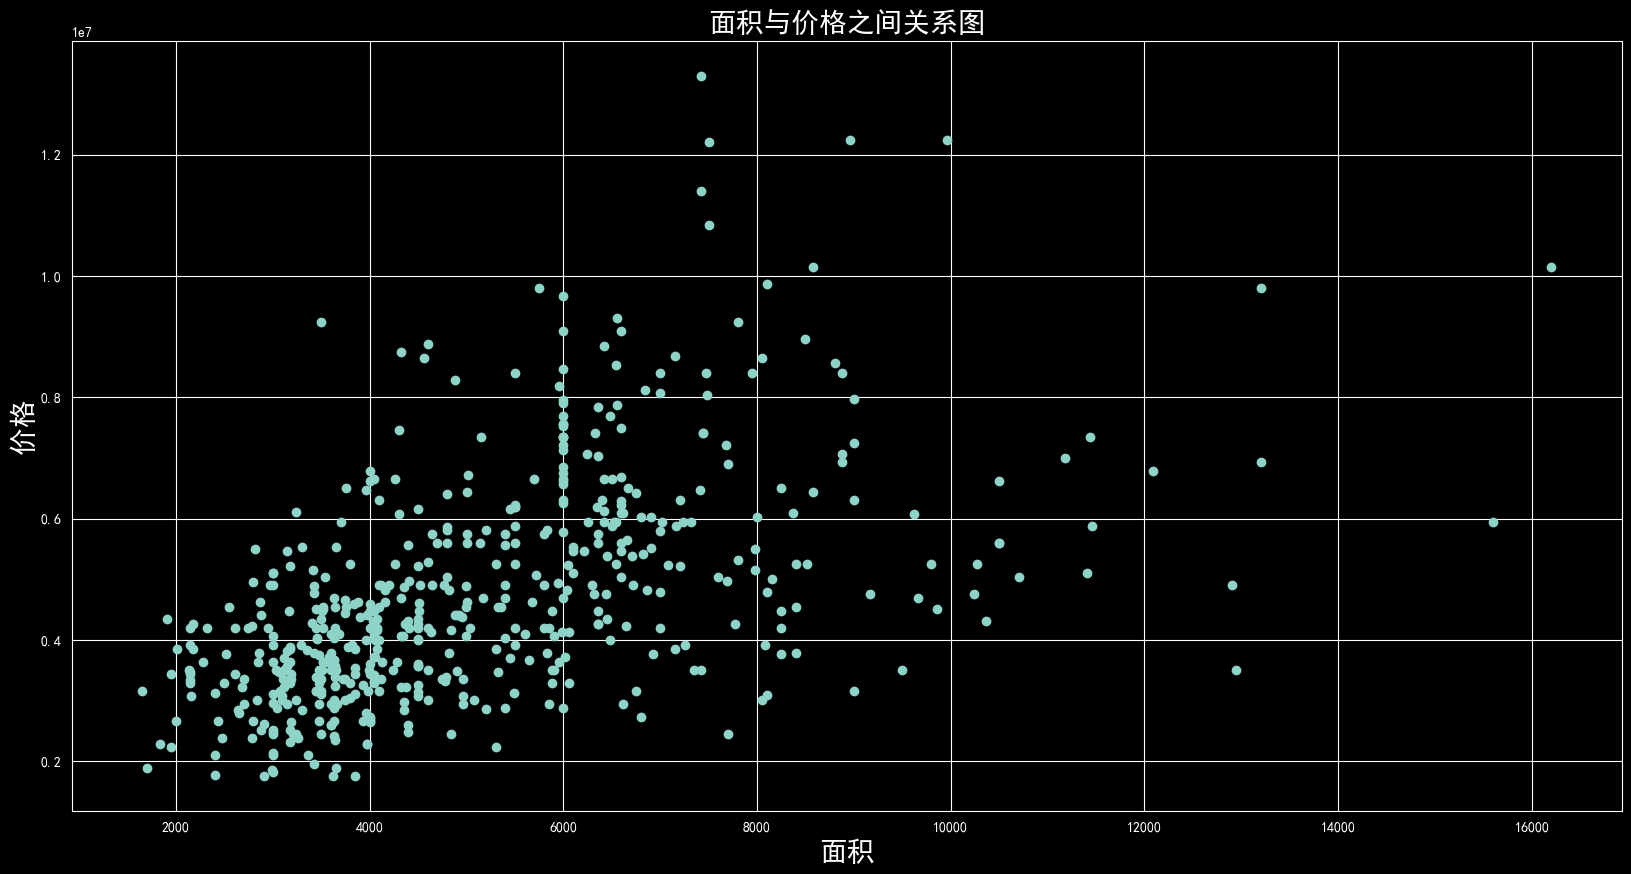

In [9]:

# data['area']
# type(np.array(data['area']))
# np.array(data['area']).size
x = np.array(data['area'])
y = np.array(data['price'])
# print(y)
plt.figure(figsize = (20,10), dpi = 100)
plt.scatter(x ,y)

plt.xlabel('面积', size = 20)
plt.ylabel('价格', size = 20)
plt.title('面积与价格之间关系图', fontsize = 20  )
plt.show()

In [10]:
#由于数据集分布不均匀，仅获取数据密集部分，其余数据舍弃
data_dense = data[(data.area<10000) & (data.price<10000000)]
print(data_dense.head())
print(data_dense.shape)

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
8   9870000  8100         4          1        2         0          1   
9   9800000  5750         3          2        4         0          1   
11  9681000  6000         4          3        2         0          1   
12  9310000  6550         4          2        2         0          0   
13  9240000  3500         4          2        2         0          0   

    basement  hotwaterheating  airconditioning  parking  prefarea  \
8          1                0                0        2         0   
9          0                0                0        1         0   
11         1                1                1        2         1   
12         0                0                0        1         0   
13         0                1                1        2         1   

    furnishingstatus  
8                  0  
9                  2  
11                 1  
12                 1  
13                 0  
(520, 13)


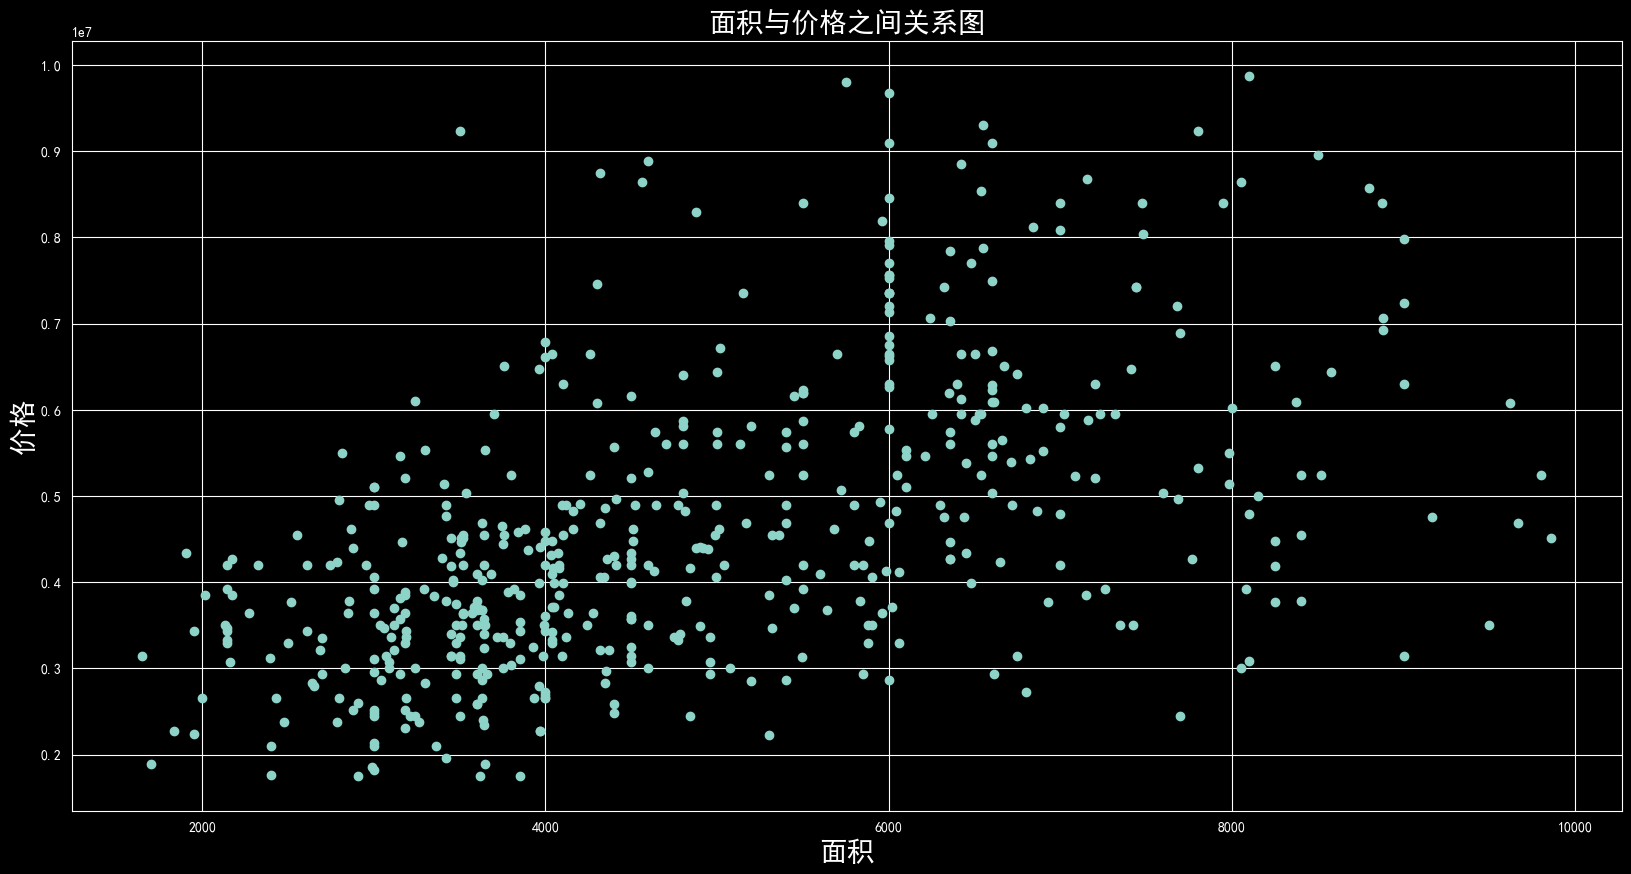

In [11]:
x = np.array(data_dense['area'])
y = np.array(data_dense['price'])
# print(y)
plt.figure(figsize = (20,10), dpi = 100)
plt.scatter(x ,y)

plt.xlabel('面积', size = 20)
plt.ylabel('价格', size = 20)
plt.title('面积与价格之间关系图', fontsize = 20  )
plt.show()

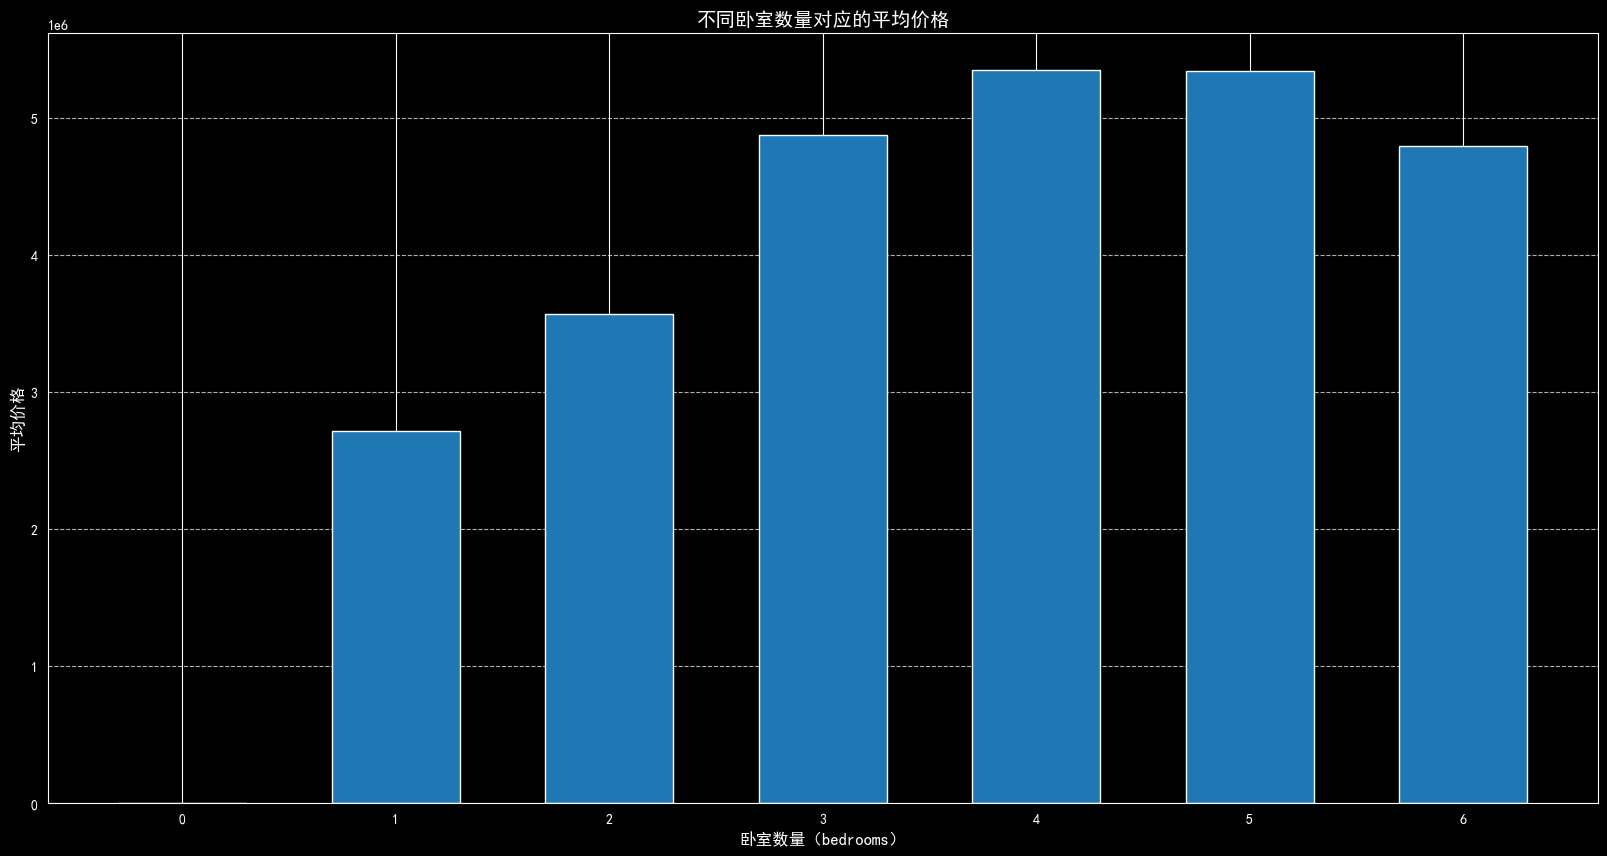

In [25]:
#卧室数量与价格之间的关系
x = [i for i in range(data_dense['bedrooms'].max()+1)]
y = []
for i in x:
    y.append(data_dense[data_dense['bedrooms'] == i].price.mean() if len( data_dense[data_dense['bedrooms'] == i]) > 0 else 0)
# print(y)
plt.figure(figsize = (20,10), dpi = 100)
plt.bar(x, y, color="#1f77b4", width=0.6)
plt.title("不同卧室数量对应的平均价格", fontsize=14)
plt.xlabel("卧室数量（bedrooms）", fontsize=12)
plt.ylabel("平均价格", fontsize=12)
# 显示网格（可选，增强可读性）
plt.grid(axis="y", linestyle="--", alpha=0.7)
# 显示图表
plt.show()

C:\Users\LYD\AppData\Local\Temp\ipykernel_17104\1021564291.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(
C:\Users\LYD\AppData\Local\Temp\ipykernel_17104\1021564291.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(
C:\Users\LYD\AppData\Local\Temp\ipykernel_17104\1021564291.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[2].boxplot(


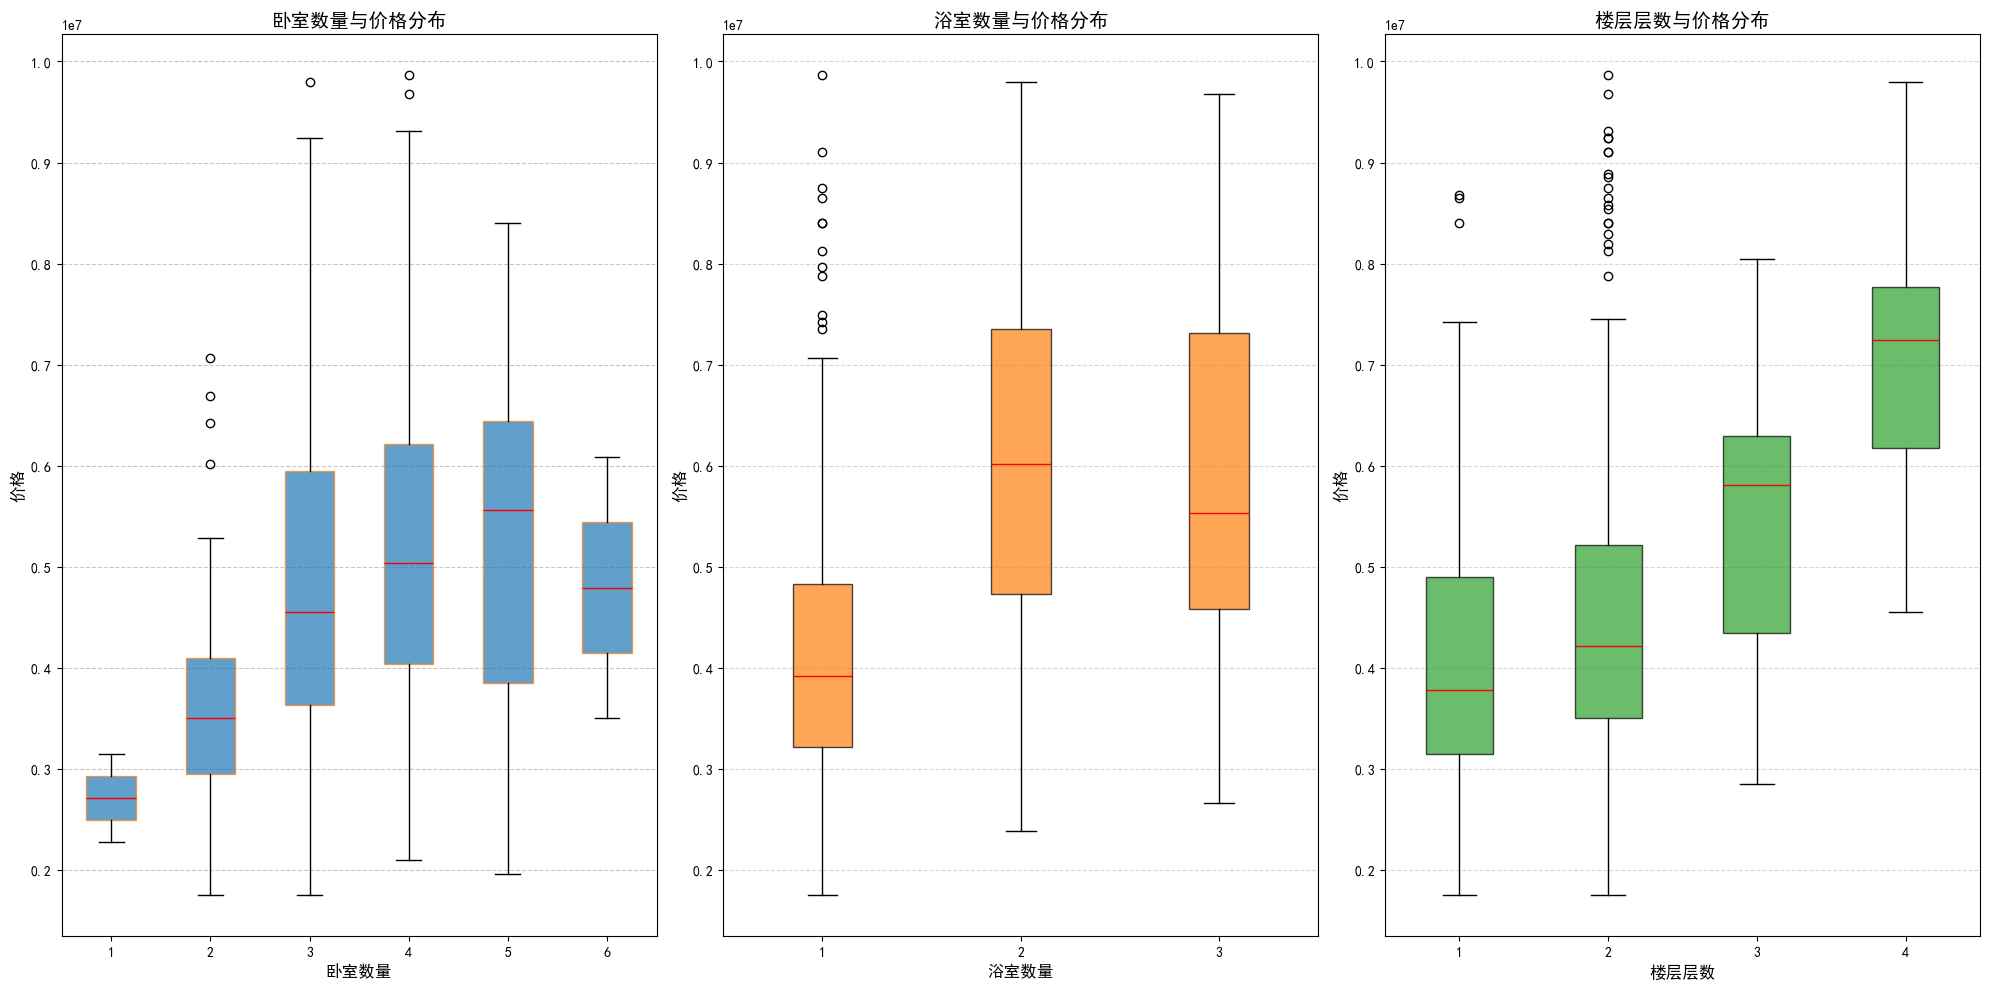

In [28]:
#箱型图，研究，卧室数量，浴室数量，楼层层数 与价格之间的关系
fig, axes = plt.subplots(1, 3, figsize = (20,10), dpi = 100)
#子图1
axes[0].boxplot(
    [data_dense[data_dense['bedrooms'] == i]['price'] for i in sorted(data_dense['bedrooms'].unique())],
    labels = sorted(data_dense['bedrooms'].unique()),
    patch_artist = True,
    boxprops = {'facecolor':'#1f77b4', 'edgecolor':'#ff7f0e', 'alpha':0.7},
    medianprops = {'color':'red'},
)
axes[0].set_title("卧室数量与价格分布", fontsize = 14)
axes[0].set_xlabel("卧室数量", fontsize = 12)
axes[0].set_ylabel("价格", fontsize = 12)
#添加y轴网格
axes[0].grid(axis="y", linestyle="--", alpha=0.7)

# 子图2：浴室数量 vs 价格 箱型图
axes[1].boxplot(
    [data_dense[data_dense['bathrooms'] == i]['price'] for i in sorted(data_dense['bathrooms'].unique())],
    labels=sorted(data_dense['bathrooms'].unique()),
    patch_artist=True,
    boxprops={'facecolor': '#ff7f0e', 'alpha': 0.7},
    medianprops={'color': 'red'}
)
axes[1].set_title("浴室数量与价格分布", fontsize=14)
axes[1].set_xlabel("浴室数量", fontsize=12)
axes[1].set_ylabel("价格", fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

# 子图3：楼层层数 vs 价格 箱型图
axes[2].boxplot(
    [data_dense[data_dense['stories'] == i]['price'] for i in sorted(data_dense['stories'].unique())],
    labels=sorted(data_dense['stories'].unique()),
    patch_artist=True,
    boxprops={'facecolor': '#2ca02c', 'alpha': 0.7},
    medianprops={'color': 'red'}
)
axes[2].set_title("楼层层数与价格分布", fontsize=14)
axes[2].set_xlabel("楼层层数", fontsize=12)
axes[2].set_ylabel("价格", fontsize=12)
axes[2].grid(axis='y', linestyle='--', alpha=0.5)

# 调整子图间距，避免重叠
plt.tight_layout()
# 显示图表
plt.show()

In [29]:
#计算特征值之间的相关系数
correlation = data_dense.corr(method='pearson')
print(correlation)



                     price      area  bedrooms  bathrooms   stories  mainroad  \
price             1.000000  0.541789  0.349733   0.485430  0.444454 -0.305248   
area              0.541789  1.000000  0.152362   0.190665  0.132542 -0.304263   
bedrooms          0.349733  0.152362  1.000000   0.351923  0.401587  0.018881   
bathrooms         0.485430  0.190665  0.351923   1.000000  0.311337 -0.032894   
stories           0.444454  0.132542  0.401587   0.311337  1.000000 -0.125417   
mainroad         -0.305248 -0.304263  0.018881  -0.032894 -0.125417  1.000000   
guestroom         0.315342  0.234096  0.084161   0.160059  0.042857 -0.099027   
basement          0.180303  0.059246  0.101175   0.118598 -0.171887 -0.043214   
hotwaterheating   0.115343 -0.019608  0.063924   0.086889  0.028190  0.011513   
airconditioning  -0.460495 -0.275302 -0.155798  -0.169798 -0.299323  0.103530   
parking           0.330400  0.351790  0.123671   0.140594  0.030062 -0.196403   
prefarea         -0.301584 -